In [1]:
## house_price prediction 복습

* linear regression 의 평가지표 : accuracy(r2_score)
* 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('./data_ml/house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# 결측치 많은 행 제거
df.isnull().sum().sort_values(ascending=False)[:6]

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
dtype: int64

In [6]:
# 결측치 많은 행 이름
col_name = df.isnull().sum().sort_values(ascending=False)[:6].index

In [7]:
df.drop(columns = col_name, inplace= True)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# df.info()

In [10]:
df.nunique().sort_values(ascending=False)[:10]

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

In [11]:
# id는 확실히 관련없음
df.drop(columns='Id',inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)[:10]

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
BsmtFinType2    38
BsmtExposure    38
BsmtQual        37
BsmtCond        37
BsmtFinType1    37
dtype: int64

In [13]:
# 결측값 채우기
df.fillna(df.mean(), inplace=True)

In [14]:
df.isnull().sum().sort_values() # 안채워진값 object형-> 각 항목별로 나눠

MSSubClass        0
SaleCondition     0
HeatingQC         0
CentralAir        0
1stFlrSF          0
                 ..
BsmtExposure     38
GarageQual       81
GarageFinish     81
GarageCond       81
GarageType       81
Length: 74, dtype: int64

In [15]:
df_ohe = pd.get_dummies(df)
df_ohe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [16]:
(df_ohe.dtypes == 'object').sum()

0

In [17]:
# 가장 기본적인 모델 돌리기

In [18]:
# Linear Regression 모델을 생성하고 평가하시오...(LinearRegression, Ridge, Lasso)

In [19]:
y = df_ohe['SalePrice']
x = df_ohe.drop('SalePrice',axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

In [21]:
x_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
632,20,11900,7,5,1977,1977,209.0,822,0,564,...,0,0,0,1,0,0,0,1,0,0
1131,20,10712,5,5,1991,1992,0.0,212,0,762,...,0,0,1,0,1,0,0,0,0,0
789,60,12205,6,8,1966,2007,157.0,568,0,264,...,0,0,0,1,0,0,0,0,1,0
572,60,13159,7,5,2009,2009,0.0,0,0,846,...,0,1,0,0,0,0,0,0,0,1
1349,70,5250,8,5,1872,1987,0.0,259,0,425,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,50,4500,5,5,1932,2000,0.0,182,0,611,...,0,0,0,1,1,0,0,0,0,0
1299,20,7500,5,7,1959,1994,0.0,340,906,0,...,0,0,0,1,0,0,0,0,1,0
86,60,11911,6,5,2005,2005,0.0,0,0,684,...,0,0,0,1,0,0,0,0,1,0
724,20,13286,9,5,2007,2008,340.0,1234,0,464,...,0,0,0,1,0,0,0,0,1,0


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
lr = LinearRegression()
rid = Ridge()
lasso = Lasso()
models = [lr, rid, lasso]

from sklearn.metrics import mean_squared_error

for m in models:
    m.fit(x_train, y_train)
    preds = m.predict(x_test)
    accuracy = m.score(x_test, y_test)   # score(,) 모델 내 값으로 계산
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print('--------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)    

--------
LinearRegression
accuracy : 0.8686242286516164
rmse : 30959.88258025442
--------
Ridge
accuracy : 0.8675734338668761
rmse : 31083.450608819392
--------
Lasso
accuracy : 0.8863496612419941
rmse : 28795.659711592227


In [23]:
# scale을 조절한 후 linear model로 예측하고 모델을 평가하시오.

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [25]:
# StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [26]:
lr = LinearRegression()
rid = Ridge()
lasso = Lasso()
models = [lr, rid, lasso]

from sklearn.metrics import mean_squared_error

for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    accuracy = m.score(x_test_scaled, y_test)   # score(,) 모델 내 값으로 계산
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print('--------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)    

--------
LinearRegression
accuracy : -1.0906982903388209e+22
rmse : 8920598266253150.0
--------
Ridge
accuracy : 0.8835764445195284
rmse : 29144.868121290143
--------
Lasso
accuracy : 0.8857446885424285
rmse : 28872.199151660585


In [27]:
# Minmaxscaler

scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
for m in models:
    m.fit(x_train_scaled, y_train)
    preds = m.predict(x_test_scaled)
    accuracy = m.score(x_test_scaled, y_test)   # score(,) 모델 내 값으로 계산
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    
    print('--------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)

--------
LinearRegression
accuracy : -1.2612580221313339e+21
rmse : 3033497463951898.0
--------
Ridge
accuracy : 0.8617274358917482
rmse : 31762.133999550417
--------
Lasso
accuracy : 0.8863743025188033
rmse : 28792.53785425781


In [29]:
# GridSearchCV

In [30]:
from sklearn.model_selection import GridSearchCV

In [45]:
rid_paramas = {'alpha': [20,30,50,100,200,300,500,700]}
lasso_params = {'alpha': [0.1, 0.5, 1.5, 10, 20]}

In [46]:
# ridge 모델

In [47]:
grid = GridSearchCV(rid, param_grid=rid_parmas, refit=True, verbose=True)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Ridge(), param_grid={'alpha': [20, 30, 50, 100]},
             verbose=True)

In [48]:
grid.best_params_

{'alpha': 20}

In [49]:
grid.best_score_

0.824606022375907

In [63]:
# 직접해보니 더 큰 score값을 찾을 수 있었다.
rid1 = Ridge(alpha = 0.01)
rid1.fit(x_train_scaled,y_train)
rid1.predict(x_test_scaled)
rid1.score(x_test_scaled,y_test)

0.8701081076587168

In [ ]:
# lasso 모델

In [42]:
grid = GridSearchCV(lasso, param_grid=lasso_params, refit=True, verbose=True)
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.1, 0.5, 1.5, 10, 20]},
             verbose=True)

In [43]:
grid.best_params_

{'alpha': 20}

In [44]:
grid.best_score_

0.7854843525308466

In [ ]:
# feature importance: 모델들의 coef들을 사용해서 알아볼 수 있다

In [90]:
y = df['SalePrice']
x = df.drop('SalePrice', axis=1)

In [91]:
x_ohe = pd.get_dummies(x)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()

x_ohe_scaled1 = scaler.fit_transform(x_ohe)
x_ohe_scaled1 # array 데이터

array([[ 0.07337496, -0.20714171,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.09188637, -0.07183611, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496,  0.07347998,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 0.30985939, -0.14781027,  0.65147924, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.08016039, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276, -0.05811155, -0.79515147, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [93]:
x_ohe_scaled = pd.DataFrame(x_ohe_scaled1, columns = x_ohe.columns)

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x_ohe_scaled, y, random_state=111)

In [95]:
models = [lr,rid, lasso]
trained_model = []

for m in models:
    m.fit(x_train,y_train)
    trained_model.append(m)
    preds = m.predict(x_test)
    accuracy = m.score(x_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    print('--------')
    print(m.__class__.__name__)
    print('accuracy :', accuracy)
    print('rmse :', rmse)
    

--------
LinearRegression
accuracy : -1.5429102557673386e+25
rmse : 3.453041182056039e+17
--------
Ridge
accuracy : 0.8789418053132355
rmse : 30586.411109522316
--------
Lasso
accuracy : 0.8798513909303782
rmse : 30471.28707351206


In [96]:
trained_model

[LinearRegression(), Ridge(), Lasso()]

In [97]:
# LinearRegression
feature_imp = pd.Series(trained_model[0].coef_, index = x_ohe_scaled.columns).sort_values(ascending=False)
feature_imp.head()

Heating_Floor    9.386183e+16
MSZoning_RL      5.611423e+16
LotShape_Reg     5.363599e+16
LotShape_IR1     5.240299e+16
MSZoning_RM      4.896042e+16
dtype: float64

<AxesSubplot:>

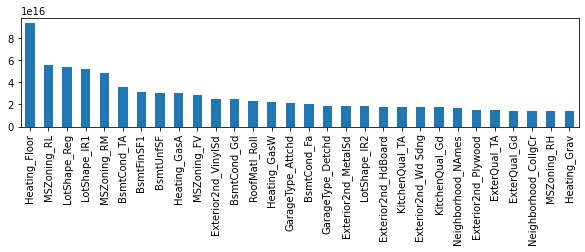

In [98]:
feature_imp.head(30).plot(kind='bar', figsize=(10,2))